In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [7]:
indep=dataset[['age','bmi','children','sex_male','smoker_yes']]

In [8]:
indep

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [9]:
dep=dataset['charges']

In [10]:
dep

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep, dep, test_size=0.30,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion='absolute_error', splitter='random')
regressor=regressor.fit(x_train,y_train)

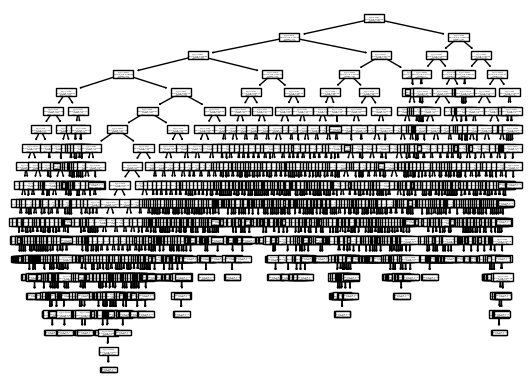

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [14]:
y_pred=regressor.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [16]:
r_score

0.739500087680822

In [17]:
import pickle
filename="finalized_model_decisiontree_Linear.sav"
pickle.dump(regressor,open(filename,'wb'))

In [18]:
loaded_model=pickle.load(open("finalized_model_decisiontree_linear.sav",'rb'))
result=loaded_model.predict([[3,54,3,5,3]])

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [19]:
result

array([42112.2356])